# **Système de détection d'intrusion (IDS**)
- Les systèmes de détection d’intrusion sont des outils ayant pour objectifs de **détecter des activités malicieuses** sur la cible qu'ils surveillent. 
- Une alerte sera déclenchée dès lors qu’un comportement malicieux est détecté. - Les systèmes de détection d'intrusion sont utilisés en plus des solutions traditionnelles telles que les pare-feux, pour détecter différents types d'utilisation malicieuse de leur cible qui ne peuvent être détectée par ces dernières.
- Pour cela, de nombreux paramètres doivent être pris en compte selon ce que l’on cherche à surveiller.

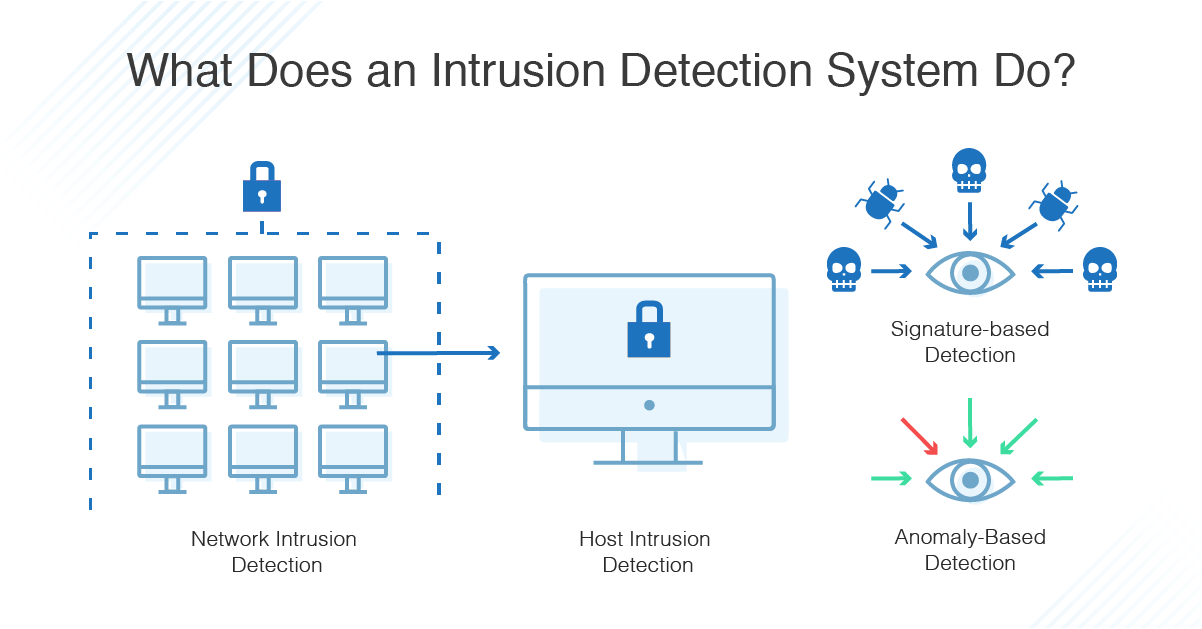

# **NSL-KDD dataset**
- Dans ce Notebook on va utilisé NSL-KDD dataset
- L'ensemble de données NSL-KDD contient des enregistrements de trafic réseau pour une variété d'activités, notamment les attaques, les scans, les intrusions et les activités normales.
- Les données sont présentées sous forme de 43 attributs qui comprennent des informations telles que l'adresse IP source, l'adresse IP de destination, le port source, le port de destination, le protocole et les indicateurs de temps, ainsi que les étiquettes de classe qui décrivent la catégorie de trafic.

- Le NSL-KDD dataset a été largement utilisé comme ensemble de données de référence pour la détection d'intrusions dans les réseaux informatiques et pour l'évaluation des performances des algorithmes de classification de trafic réseau.

# **Importer les bibliothèques nécessaires :**

- pandas pour charger et manipuler les données à partir d'un fichier CSV.
- Bibliothèques Sklearn pour le prétraitement, la sélection de modèles et l'évaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt


- Chargement du jeu de données NSL-KDD à partir du chemin de fichier spécifié en utilisant la méthode read_csv de la bibliothèque pandas.

In [ ]:
data = pd.read_csv('/content/csv_result-KDDTrain+.csv')

- Définir les noms des colonnes d'un DataFrame pandas appelé data. 
- La liste des noms de colonnes est définie dans la variable columns, qui comprend les noms de 41 caractéristiques différentes des données de trafic réseau. 
- La dernière colonne, label, est la variable cible qui indique le type d'attaque réseau qui s'est produite. 
- Le code définit les noms des colonnes de données aux valeurs des colonnes en utilisant l'attribut columns du DataFrame. 
- Cette étape est importante pour rendre les données plus lisibles et plus faciles à manipuler.

In [ ]:
columns=['id', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
       'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']
data.columns = columns

- Voici une brève description de chaque feature:
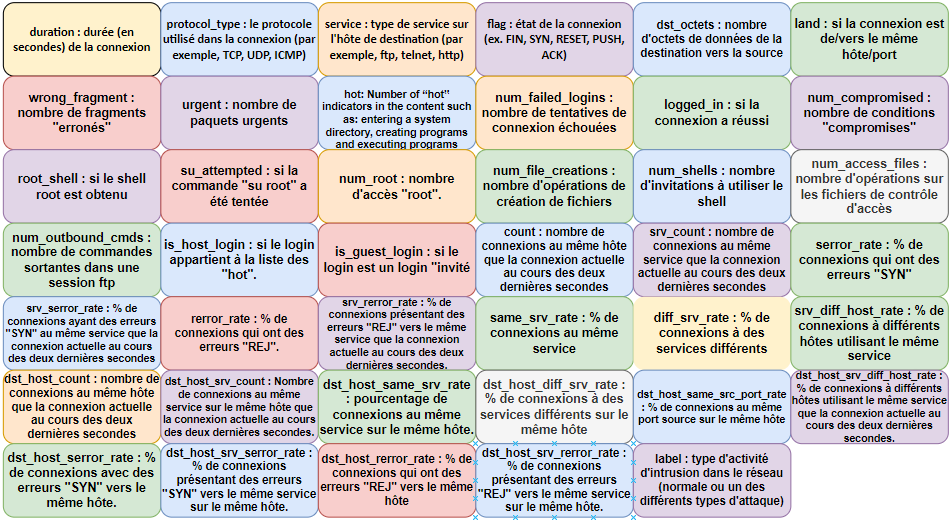

- Suppression des enregistrements avec des valeurs manquantes en utilisant la méthode dropna de la bibliothèque pandas.

In [ ]:
data = data.dropna()

- Afficher les premières lignes de data

In [ ]:
data.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


- Distribution des labels normales et anormales dans un Pie chart

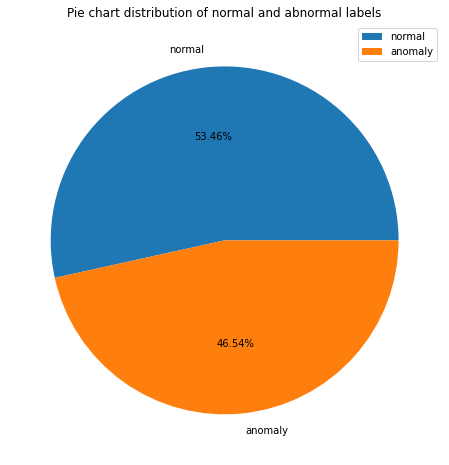

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

# **Encode categorical features**

- L'encodage est une étape importante dans le traitement des données, qui consiste à convertir les valeurs de caractéristiques catégorielles en nombres, afin que ces caractéristiques puissent être utilisées dans des modèles d'apprentissage automatique.

In [ ]:
# Encode categorical features
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    ord_enc = OrdinalEncoder()
    data[feature] = ord_enc.fit_transform(data[[feature]])

- Le code utilise la classe "OrdinalEncoder" de la bibliothèque "sklearn.preprocessing" pour encoder chaque caractéristique catégorielle.
- La liste "categorical_features" contient les noms de toutes les caractéristiques catégorielles à encoder.

- Dans la boucle "for", l'objet "ord_enc" de la classe "OrdinalEncoder" est créé pour chaque caractéristique. La méthode "fit_transform" de l'objet "ord_enc" est ensuite utilisée pour encoder les valeurs de chaque caractéristique.
- Cette méthode ajuste un encodeur sur les données d'entrée, puis transforme les valeurs de cette caractéristique en un tableau d'entiers.

- Les valeurs encodées remplacent ensuite les valeurs d'origine de chaque caractéristique catégorielle dans l'ensemble de données "data". 
- De cette façon, toutes les caractéristiques catégorielles de l'ensemble de données sont converties en nombres, ce qui permet à des modèles d'apprentissage automatique de les utiliser pour effectuer des prédictions.

# **Split the data into training and test sets**

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

- Les données sont divisées en deux parties : les caractéristiques d'entrée (ou "features") et les étiquettes de sortie (ou "labels").

- La première ligne crée un nouvel objet "X" en supprimant la colonne "label" de l'ensemble de données "data". 
- Cela signifie que "X" contient toutes les caractéristiques d'entrée de l'ensemble de données, à l'exception de l'étiquette de sortie.

- La deuxième ligne crée un objet "y" qui contient seulement la colonne "label" de l'ensemble de données "data".
- Cela signifie que "y" contient les étiquettes de sortie (ou "labels") de l'ensemble de données.

- En divisant l'ensemble de données de cette manière, les caractéristiques d'entrée "X" et les étiquettes de sortie "y" peuvent être utilisées pour entraîner un modèle d'apprentissage automatique.
- La partie "test" de l'ensemble de données peut être utilisée pour évaluer la performance du modèle une fois qu'il a été entraîné sur l'ensemble d'apprentissage.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Ce code est utilisé pour diviser l'ensemble de données en un ensemble d'apprentissage (train) et un ensemble de test (test) en utilisant la fonction "train_test_split" de la bibliothèque "sklearn.model_selection".
- Cette division est importante pour évaluer la performance d'un modèle d'apprentissage automatique sur des données qu'il n'a jamais vues auparavant.

- La première ligne crée un objet "X_train" qui contient les caractéristiques d'entrée de l'ensemble de données "X", qui ont été divisées en un ensemble d'apprentissage.

- La deuxième ligne crée un objet "X_test" qui contient les caractéristiques d'entrée de l'ensemble de données "X", qui ont été divisées en un ensemble de test.

- La troisième ligne crée un objet "y_train" qui contient les étiquettes de sortie (ou "labels") de l'ensemble de données "y", qui ont été divisées en un ensemble d'apprentissage.

- La quatrième ligne crée un objet "y_test" qui contient les étiquettes de sortie (ou "labels") de l'ensemble de données "y", qui ont été divisées en un ensemble de test.

- La taille de l'ensemble de test est définie par le paramètre "test_size", qui est défini à 0,3 dans ce cas. 
- Cela signifie que 30% des données sont réservées pour l'ensemble de test, tandis que les 70% restants sont utilisés pour l'ensemble d'apprentissage.
- Le paramètre "random_state" est utilisé pour initialiser le générateur de nombres aléatoires afin de s'assurer que la division est toujours la même, ce qui permet de reproduire les résultats.

# **Normaliser les caractéristiques en utilisant le scaler standard**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- La normalisation est une étape importante dans la préparation des données pour l'apprentissage automatique, car elle permet de mettre toutes les caractéristiques à la même échelle, ce qui peut aider à améliorer la performance des modèles.

- La première ligne crée un nouvel objet "scaler" qui contient une instance de la classe "StandardScaler". Cette classe est utilisée pour standardiser les caractéristiques en les centrant autour de 0 et en les redimensionnant en fonction de leur écart type.

- La deuxième ligne utilise l'objet "scaler" pour standardiser les caractéristiques d'entrée de l'ensemble d'apprentissage "X_train" en utilisant la méthode "fit_transform". Cela signifie que l'objet "scaler" calcule la moyenne et l'écart type de chaque caractéristique de l'ensemble d'apprentissage, puis les utilise pour standardiser les caractéristiques. Les caractéristiques standardisées sont ensuite stockées dans un nouvel objet "X_train".

- La troisième ligne utilise l'objet "scaler" pour standardiser les caractéristiques d'entrée de l'ensemble de test "X_test" en utilisant la méthode "transform". Cela signifie que l'objet "scaler" utilise les moyennes et les écarts types calculés précédemment pour standardiser les caractéristiques de l'ensemble de test. Les caractéristiques standardisées sont ensuite stockées dans un nouvel objet "X_test".

- En normalisant les caractéristiques de cette manière, elles sont mises à la même échelle et peuvent être utilisées pour entraîner des modèles d'apprentissage automatique plus performants.

# **Entraînement d'un classificateur KNN sur l'ensemble d'entraînement**

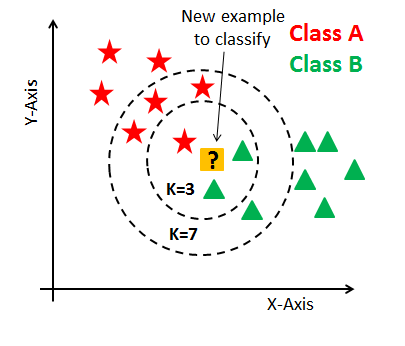

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

- On entraîne un classificateur KNN (K-Nearest Neighbors) sur l'ensemble de données d'apprentissage normalisé, en utilisant la bibliothèque "sklearn.neighbors".

- La première ligne crée un objet KNeighborsClassifier avec l'argument "n_neighbors=5", ce qui signifie que le modèle va considérer les 5 voisins les plus proches pour chaque point.

- La deuxième ligne utilise la méthode "fit" pour entraîner le modèle en utilisant les caractéristiques normalisées d'entrée "X_train" et les étiquettes correspondantes de sortie "y_train". Cela permet au modèle d'apprendre à prédire les étiquettes de sortie pour de nouvelles entrées.

- Une fois le modèle entraîné, il peut être utilisé pour prédire les étiquettes de sortie pour de nouvelles entrées en utilisant la méthode "predict".

**Prédire les labels cibles pour l'ensemble de test**

In [ ]:
y_pred = knn.predict(X_test)

# **Évaluer la performance du classificateur**

In [ ]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 99.38%


- On utilise la fonction "accuracy_score" de la bibliothèque "sklearn.metrics" pour calculer l'exactitude (ou "accuracy") du modèle. Cette fonction prend les étiquettes réelles "y_test" et les étiquettes prédites "y_pred" comme entrées, et renvoie l'exactitude du modèle en pourcentage.

**Matrice de Confusion**

- La fonction "confusion_matrix" de la bibliothèque "sklearn.metrics" pour calculer la matrice de confusion du modèle. 
- Cette fonction prend les labels réelles "y_test" et les labels prédites "y_pred" comme entrées, et renvoie la matrice de confusion qui montre le nombre de vrais positifs, de faux positifs, de vrais négatifs et de faux négatifs pour chaque classe.

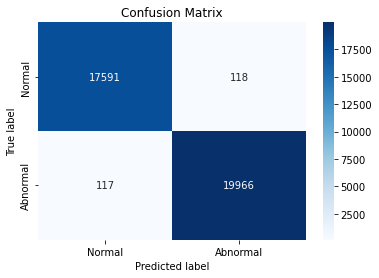

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

- La fonction "classification_report" de la bibliothèque "sklearn.metrics" pour calculer le rapport de classification du modèle. 
- Cette fonction prend les labels réelles "y_test" et les labels prédites "y_pred" comme entrées, et renvoie un rapport de classification qui montre des métriques de performance telles que la précision, le rappel et le score F1 pour chaque classe, ainsi que la précision moyenne pondérée (ou "weighted average precision"), le rappel et le score F1 pour toutes les classes combinées.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99     17709
      normal       0.99      0.99      0.99     20083

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



# **Enregister le modèle :**

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']

# **Create a streamlit app to create a UI for prediction** 

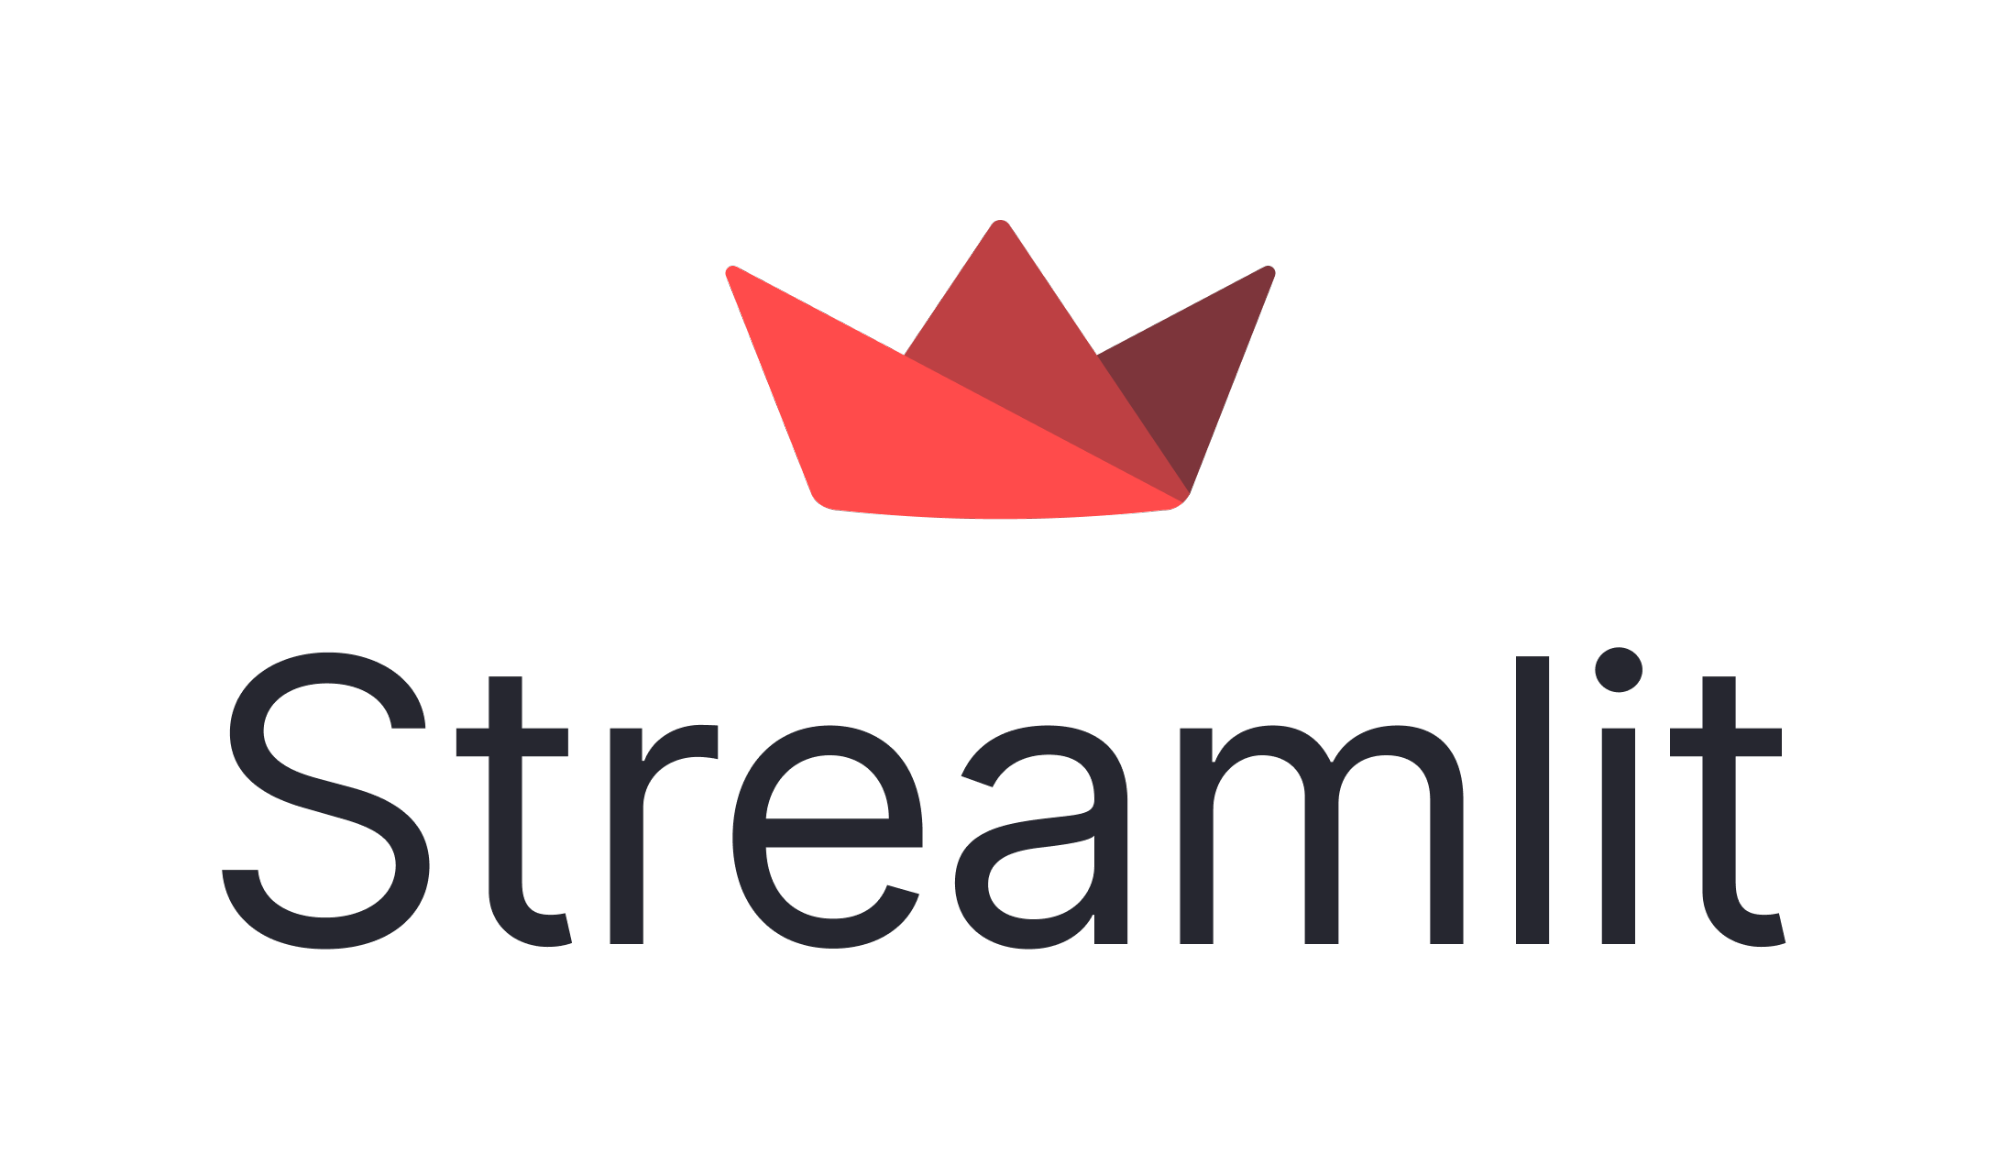

**Install Streamlit**

In [ ]:

!pip install -q streamlit

**Write streamlit_app.py script**

In [ ]:
%%writefile streamlit_app.py
from sklearn.preprocessing import OrdinalEncoder
import streamlit as st
import pandas as pd
import joblib
# Load the saved model from a file
id=1
knn_loaded = joblib.load('knn_model.joblib')
# Set the title and page layout
st.set_page_config(page_title='Intrusion Detection', page_icon='🔒', layout='wide')
st.title('Intrusion Detection')
# Define the input fields for each feature
duration = st.number_input('Duration', min_value=0)
protocol_type = st.selectbox('Protocol Type', ['tcp', 'udp', 'icmp'])
service = st.selectbox('Service', ['http', 'smtp', 'ftp', 'dns', 'ssh', 'ssl', 'dhcp'])
flag = st.selectbox('Flag', ['SF', 'REJ', 'RSTO', 'RSTR', 'S0', 'S1', 'S2', 'S3'])
src_bytes = st.number_input('Source Bytes', min_value=0)
dst_bytes = st.number_input('Destination Bytes', min_value=0)
land = st.selectbox('Land', [0, 1])
wrong_fragment = st.number_input('Wrong Fragment', min_value=0)
urgent = st.number_input('Urgent', min_value=0)
hot = st.number_input('Hot', min_value=0)
num_failed_logins = st.number_input('Number of Failed Logins', min_value=0)
logged_in = st.selectbox('Logged In', [0, 1])
num_compromised = st.number_input('Number of Compromised Connections', min_value=0)
root_shell = st.selectbox('Root Shell', [0, 1])
su_attempted = st.selectbox('SU Attempted', [0, 1])
num_root = st.number_input('Number of Root Accesses', min_value=0)
num_file_creations = st.number_input('Number of File Creations', min_value=0)
num_shells = st.number_input('Number of Shells', min_value=0)
num_access_files = st.number_input('Number of Access Files', min_value=0)
num_outbound_cmds = st.number_input('Number of Outbound Commands', min_value=0)
is_host_login = st.selectbox('Is Host Login', [0, 1])
is_guest_login = st.selectbox('Is Guest Login', [0, 1])
count = st.number_input('Count', min_value=0)
srv_count = st.number_input('Service Count', min_value=0)
serror_rate = st.number_input('Serror Rate', min_value=0.0, max_value=1.0, step=0.01)
srv_serror_rate = st.number_input('Srv Serror Rate', min_value=0.0, max_value=1.0, step=0.01)
rerror_rate = st.number_input('Rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
srv_rerror_rate = st.number_input('Srv Rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
same_srv_rate = st.number_input('Same Service Rate', min_value=0.0, max_value=1.0, step=0.01)
diff_srv_rate = st.number_input('Different Service Rate', min_value=0.0, max_value=1.0, step=0.01)
srv_diff_host_rate = st.number_input('Srv Diff Host Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_count = st.number_input('Destination Host Count', min_value=0)
dst_host_srv_count = st.number_input('Destination Host Service Count', min_value=0)
dst_host_same_srv_rate = st.number_input('Destination Host Same Service Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_diff_srv_rate = st.number_input('Destination Host Difference Service Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_same_src_port_rate = st.number_input('Destination Host Same Service Port Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_srv_diff_host_rate = st.number_input('Destination Host  Service different Host Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_serror_rate = st.number_input('Destination Host  Serror Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_srv_serror_rate = st.number_input('Destination Host  Service serror Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_rerror_rate = st.number_input('Destination Host  rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_srv_rerror_rate = st.number_input('Destination Host  Service rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
# Create a dictionary with the user input values
input_dict = {'id':id,'duration': duration,
              'protocol_type': protocol_type,
              'service': service,
              'flag': flag,
              'src_bytes': src_bytes,
              'dst_bytes': dst_bytes,
              'land': land,
              'wrong_fragment': wrong_fragment,
              'urgent': urgent,
              'hot': hot,
              'num_failed_logins': num_failed_logins,
              'logged_in': logged_in,
              'num_compromised': num_compromised,
              'root_shell': root_shell,
              'su_attempted': su_attempted,
              'num_root': num_root,
              'num_file_creations': num_file_creations,
              'num_shells': num_shells,
              'num_access_files': num_access_files,
              'num_outbound_cmds': num_outbound_cmds,
              'is_host_login': is_host_login,
              'is_guest_login': is_guest_login,
              'count': count,
              'srv_count': srv_count,
              'serror_rate': serror_rate,
              'srv_serror_rate': srv_serror_rate,
              'rerror_rate': rerror_rate,
              'srv_rerror_rate': srv_rerror_rate,
              'same_srv_rate': same_srv_rate,
              'diff_srv_rate': diff_srv_rate,
              'srv_diff_host_rate': srv_diff_host_rate,
              'dst_host_count': dst_host_count,
              'dst_host_srv_count': dst_host_srv_count,
              'dst_host_same_srv_rate': dst_host_same_srv_rate,
              'dst_host_diff_srv_rate': dst_host_diff_srv_rate,
              'dst_host_same_src_port_rate': dst_host_same_src_port_rate,
              'dst_host_srv_diff_host_rate': dst_host_srv_diff_host_rate,
              'dst_host_serror_rate': dst_host_serror_rate,
              'dst_host_srv_serror_rate': dst_host_srv_serror_rate,
              'dst_host_rerror_rate': dst_host_rerror_rate,
              'dst_host_srv_rerror_rate': dst_host_srv_rerror_rate}


# Encode categorical features
input_df = pd.DataFrame(input_dict, index=[0])
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    ord_enc = OrdinalEncoder()
    input_df[feature] = ord_enc.fit_transform(input_df[[feature]])
# Make predictions on the input data
if st.button("Predict"):
    prediction = knn_loaded.predict(input_df)

    # Display the prediction
    st.write('Prediction:', prediction[0])


Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.648s
your url is: https://witty-chefs-smile-35-234-8-221.loca.lt


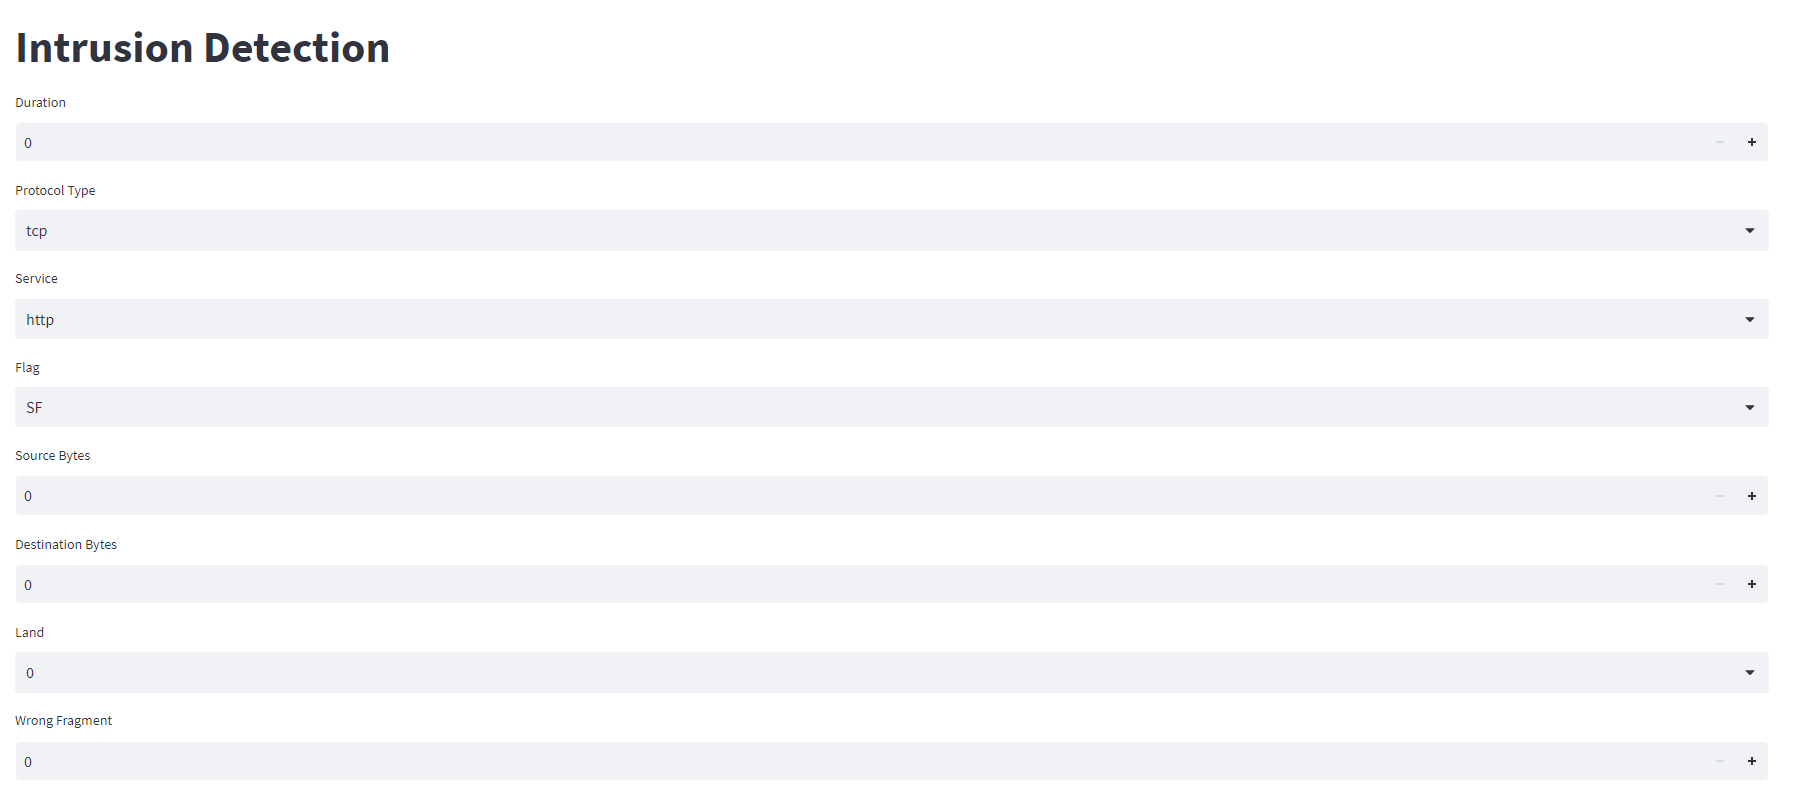